## Loading Libraries

In [66]:
# Uncomment the pip install code below if you haven't installed these libraries yet
#!pip install pandas
#!pip install zipfile
#!pip install kaggle
#!pip install matplotlib
#!pip install seaborn

import kaggle
import pandas as pd
from zipfile import ZipFile
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re

In [2]:
# Download dataset to a specified path
!kaggle datasets download -d hugomathien/soccer -p /Users/tuank/Downloads

Dataset URL: https://www.kaggle.com/datasets/hugomathien/soccer
License(s): ODbL-1.0
soccer.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
# Name of the ZIP file to extract
zipfile_name = 'soccer.zip'

# Open the ZIP file in read mode
with ZipFile(zipfile_name, 'r') as zip:
    zip.extractall()

# Print a confirmation message
print(f"Extracted all files from {zipfile_name}")

Extracted all files from soccer.zip


In [4]:
# Crete connection to the database
conn = sqlite3.connect('database.sqlite')

In [5]:
# Query to retrieve all table names and their schema information from the SQLite database
tables = pd.read_sql_query("SELECT * FROM sqlite_master where type='table';", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [6]:
# Query and load data from the each table
player_attributes = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)
players = pd.read_sql_query("SELECT * FROM Player", conn)
teams = pd.read_sql_query("SELECT * FROM Team", conn)
team_attributes = pd.read_sql_query("SELECT * FROM Team_Attributes", conn)
matches = pd.read_sql_query("SELECT * FROM Match", conn)
leagues = pd.read_sql_query("SELECT * FROM League", conn)
countries = pd.read_sql_query("SELECT * FROM Country", conn)

In [7]:
# Filter the data and load into pandas DataFrames
matches = pd.read_sql_query('''SELECT match_api_id, season, league_id, home_team_api_id, away_team_api_id, home_team_goal, away_team_goal, date, home_player_1, home_player_2, home_player_3, home_player_4, 
home_player_5, home_player_6, home_player_7, home_player_8, home_player_9, home_player_10, home_player_11, away_player_1, away_player_2, away_player_3, away_player_4, away_player_5, away_player_6,
away_player_7, away_player_8, away_player_9, away_player_10, away_player_11
FROM Match
WHERE league_id IN (SELECT id FROM League WHERE name IN ('England Premier League', 'Spain LIGA BBVA', 'Italy Serie A', 'Germany 1. Bundesliga', 'France Ligue 1'))
AND season IN ('2011/2012', '2012/2013', '2013/2014', '2014/2015', '2015/2016');
''', conn)

player_attributes = pd.read_sql_query('''SELECT player_fifa_api_id, player_api_id, date, overall_rating, potential, preferred_foot, attacking_work_rate, defensive_work_rate
FROM Player_Attributes
WHERE date BETWEEN '2011-07-01' AND '2016-06-30';
''', conn)

team_attributes = pd.read_sql_query('''SELECT *
FROM Team_Attributes
WHERE date BETWEEN '2011-07-01' AND '2016-06-30';
''', conn)


In [8]:
# Check the first few rows and the structure of each DataFrame
print('player_attributes')
print(player_attributes.info())
print('\t-------------------------------------')
print('players')
print(players.info())
print('\t-------------------------------------')
print('teams')
print(teams.info())
print('\t-------------------------------------')
print('team_attributes')
print(team_attributes.info())
print('\t-------------------------------------')
print('matches')
print(matches.info())
print('\t-------------------------------------')
print('leagues')
print(leagues.info())
print('\t-------------------------------------')
print('countries')
print(countries.info())

player_attributes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136714 entries, 0 to 136713
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_fifa_api_id   136714 non-null  int64  
 1   player_api_id        136714 non-null  int64  
 2   date                 136714 non-null  object 
 3   overall_rating       136628 non-null  float64
 4   potential            136628 non-null  float64
 5   preferred_foot       136628 non-null  object 
 6   attacking_work_rate  136628 non-null  object 
 7   defensive_work_rate  136628 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 8.3+ MB
None
	-------------------------------------
players
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  i

In [9]:
# Check for missing values in each DataFrame
print(player_attributes.isnull().sum())
print('-----------------------------')
print(players.isnull().sum())
print('-----------------------------')
print(teams.isnull().sum())
print('-----------------------------')
print(team_attributes.isnull().sum())
print('-----------------------------')
print(matches.isnull().sum())
print('-----------------------------')
print(leagues.isnull().sum())
print('-----------------------------')
print(countries.isnull().sum())

# Note: Most of the missing values is in player_attributes and matches table

player_fifa_api_id      0
player_api_id           0
date                    0
overall_rating         86
potential              86
preferred_foot         86
attacking_work_rate    86
defensive_work_rate    86
dtype: int64
-----------------------------
id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64
-----------------------------
id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64
-----------------------------
id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              484
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0


match_api_id         0
season               0
league_id            0
home_team_api_id     0
away_team_api_id     0
home_team_goal       0
away_team_goal       0
date                 0
home_player_1        4
home_player_2       19
home_player_3        7
home_player_4       14
home_player_5       10
home_player_6       11
home_player_7        9
home_player_8       10
home_player_9       14
home_player_10      29
home_player_11      33
away_player_1        2
away_player_2       18
away_player_3        6
away_player_4       13
away_player_5        9
away_player_6       19
away_player_7        7
away_player_8       13
away_player_9       13
away_player_10      24
away_player_11      41
dtype: int64
-----------------------------
id            0
country_id    0
name          0
dtype: int64
-----------------------------
id      0
name    0
dtype: int64


In [11]:
# Count of Columns of all table
print('Nb of columns for player_attributes_table are :',len(player_attributes.columns))
print('-----------------------------')
print('Nb of columns for player_table are :',len(players.columns))
print('-----------------------------')
print('Nb of columns for match_table are :',len(matches.columns))
print('-----------------------------')
print('Nb of columns for league_table are :',len(leagues.columns))
print('-----------------------------')
print('Nb of columns for country_table are :',len(countries.columns))
print('-----------------------------')
print('Nb of columns for team_table are :',len(teams.columns))
print('-----------------------------')
print('Nb of columns for team_attributes are :',len(team_attributes.columns))

Nb of columns for player_attributes_table are : 8
-----------------------------
Nb of columns for player_table are : 7
-----------------------------
Nb of columns for match_table are : 30
-----------------------------
Nb of columns for league_table are : 3
-----------------------------
Nb of columns for country_table are : 2
-----------------------------
Nb of columns for team_table are : 5
-----------------------------
Nb of columns for team_attributes are : 25


In [12]:
# Convert the date columns to datetime format
player_attributes.date = pd.to_datetime(player_attributes.date)
team_attributes.date = pd.to_datetime(team_attributes.date)

# Check to make sure that the date is converted properly
player_attributes.date.dt.year.head()
team_attributes.date.dt.month.head()

0    9
1    9
2    2
3    9
4    9
Name: date, dtype: int32

In [13]:
# Standardize data
player_attributes.preferred_foot = player_attributes.preferred_foot.str.lower()
team_attributes.buildUpPlaySpeedClass = team_attributes.buildUpPlaySpeedClass.str.lower()
team_attributes.buildUpPlayDribblingClass = team_attributes.buildUpPlayDribblingClass.str.lower()
team_attributes.buildUpPlayPositioningClass = team_attributes.buildUpPlayPositioningClass.str.lower()

In [10]:
# Leagues with country name included
leagues = pd.read_sql_query('''SELECT l.id, c.name as country_name, l.name as league_name
FROM League as l
JOIN Country as c ON c.id = l.country_id
WHERE l.name IN ('England Premier League', 'Spain LIGA BBVA', 'Italy Serie A', 'Germany 1. Bundesliga', 'France Ligue 1');''', conn)
leagues

,id,country_name,league_name
0,1729,England,England Premier League
1,4769,France,France Ligue 1
2,7809,Germany,Germany 1. Bundesliga
3,10257,Italy,Italy Serie A
4,21518,Spain,Spain LIGA BBVA


In [33]:
# Adding league short name
leagues.insert(3, 'league_short_name', ['EPL', 'Ligue 1', 'Bundesliga', 'Serie A', 'La Liga'])
leagues

,id,country_name,league_name,league_short_name
0,1729,England,England Premier League,EPL
1,4769,France,France Ligue 1,Ligue 1
2,7809,Germany,Germany 1. Bundesliga,Bundesliga
3,10257,Italy,Italy Serie A,Serie A
4,21518,Spain,Spain LIGA BBVA,La Liga


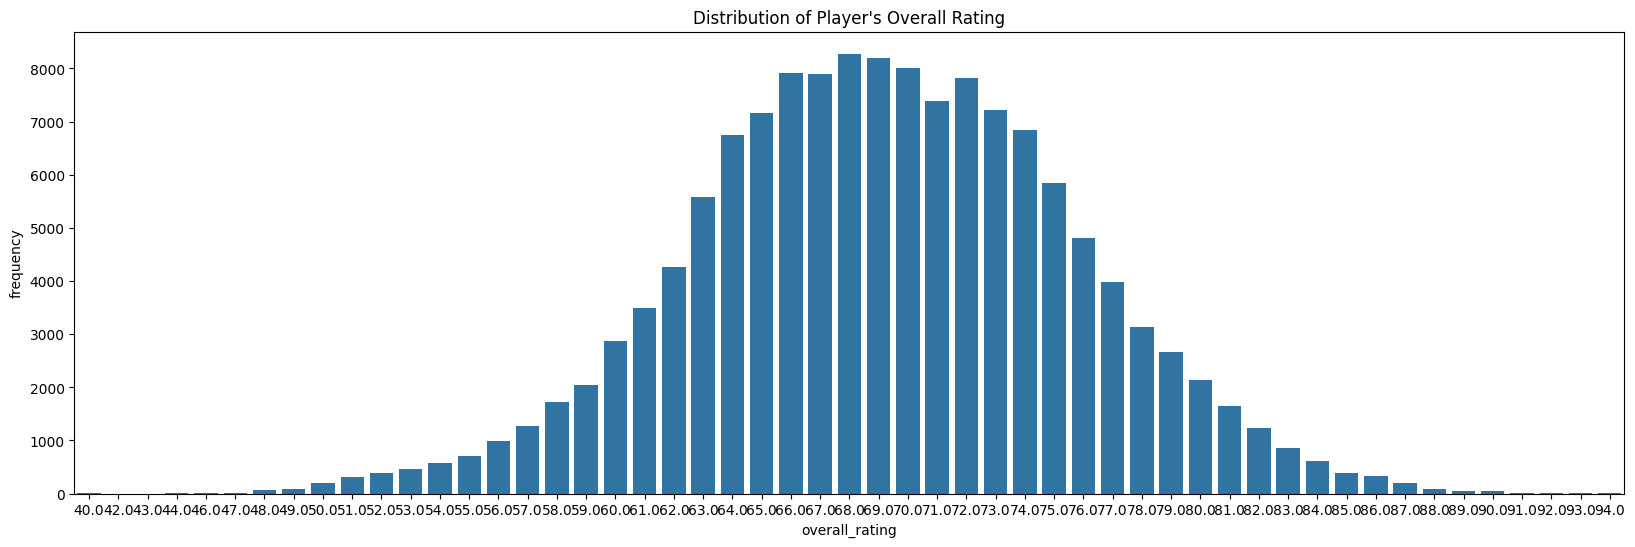

In [14]:
# Calculate the frequency of each overall rating
ovrl_frequency = player_attributes.overall_rating.value_counts()

# Extract the index (overall ratings) and values (frequencies) for plotting
x = ovrl_frequency.index
y = ovrl_frequency

# Plot distribution to identify outliers
plt.figure(figsize=(20, 6))
plt.ylabel('frequency')
plt.title("Distribution of Player's Overall Rating")
sns.barplot(x=x, y=y)
plt.show()

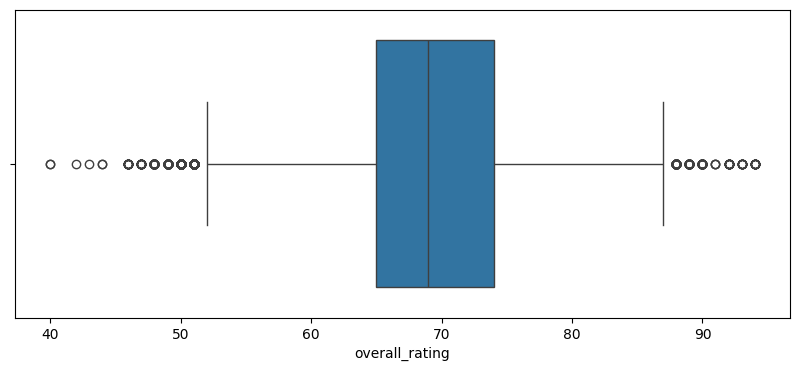

In [15]:
# Create a box plot to visualize the distribution of overall ratings
plt.figure(figsize=(10, 4))
sns.boxplot(x=player_attributes['overall_rating'])
plt.show()

In [16]:
# Convert the data type to int/float
player_attributes.overall_rating = pd.to_numeric(player_attributes.overall_rating, errors='coerce')
player_attributes.overall_rating.dtypes

# Find the limit
upper_limit_ovrl = player_attributes.overall_rating.mean() + 3*player_attributes.overall_rating.std()
lower_limit_ovrl = player_attributes.overall_rating.mean() - 3*player_attributes.overall_rating.std()
print(f'upper limit: {upper_limit_ovrl}')
print(f'lower limit: {lower_limit_ovrl}')
print(f'Nb of rows in old player_attributes table: {len(player_attributes)}')

upper limit: 88.66438085508827
lower limit: 49.69138809417543
Nb of rows in old player_attributes table: 136714


In [17]:
# Remove outliers that fall outside 3 standard deviations
# Note: I keep the upper outliers as they'll be needed for the top 10 players from the 5 leagues

#player_attributes = player_attributes.loc[(player_attributes.overall_rating < upper_limit_ovrl) & (player_attributes.overall_rating > lower_limit_ovrl)]
player_attributes = player_attributes.loc[(player_attributes.overall_rating > lower_limit_ovrl)]
print(f'Nb of rows in the new, filtered player_attributes table: {len(player_attributes)}')

Nb of rows in the new, filtered player_attributes table: 136431


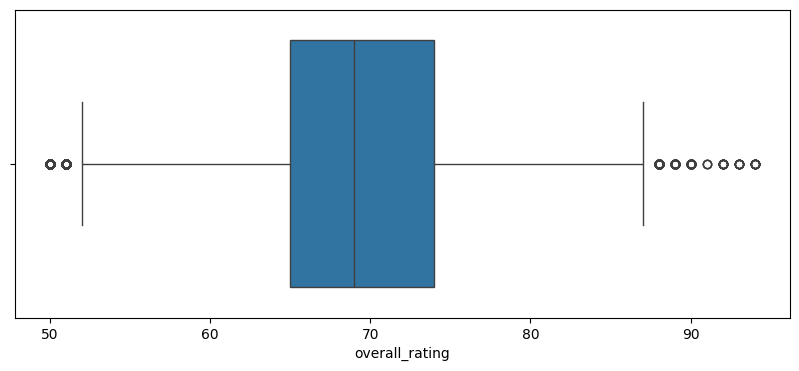

Nb of NULL values in Player Attributes:
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
dtype: int64


In [18]:
# Create a box plot to visualize the distribution of overall ratings after filtering
plt.figure(figsize=(10, 4))
sns.boxplot(x=player_attributes['overall_rating'])

plt.show()

print(f'''Nb of NULL values in Player Attributes:
{player_attributes.isnull().sum()}''')


In [19]:
# Filter match data again for joining tables purpose
matches_filtered = matches[(matches['season'].isin(['2011/2012', '2012/2013', '2013/2014', '2014/2015', '2015/2016']))]

# Join match data with team and player information
matches = matches_filtered.merge(teams, how='left', left_on='home_team_api_id', right_on='team_api_id')
matches = matches.merge(teams, how='left', left_on='away_team_api_id', right_on='team_api_id', suffixes=('_home', '_away'))

# Creating new columns in the Matches table
matches['total_goal'] = matches['away_team_goal'] + matches['home_team_goal']
matches['home_win'] = matches['home_team_goal'] > matches['away_team_goal']
matches['away_win'] = matches['away_team_goal'] > matches['home_team_goal']
matches['draw'] = matches['home_team_goal'] == matches['away_team_goal']
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9107 entries, 0 to 9106
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   match_api_id           9107 non-null   int64  
 1   season                 9107 non-null   object 
 2   league_id              9107 non-null   int64  
 3   home_team_api_id       9107 non-null   int64  
 4   away_team_api_id       9107 non-null   int64  
 5   home_team_goal         9107 non-null   int64  
 6   away_team_goal         9107 non-null   int64  
 7   date                   9107 non-null   object 
 8   home_player_1          9103 non-null   float64
 9   home_player_2          9088 non-null   float64
 10  home_player_3          9100 non-null   float64
 11  home_player_4          9093 non-null   float64
 12  home_player_5          9097 non-null   float64
 13  home_player_6          9096 non-null   float64
 14  home_player_7          9098 non-null   float64
 15  home

In [20]:
# Summarize goals, assists, and wins per season for each league
goals_per_league = matches.groupby([matches.season, matches.league_id])['total_goal'].sum().reset_index()
goals_per_league = goals_per_league.merge(leagues, how='left', left_on='league_id', right_on='id')
goals_per_league = goals_per_league.drop(columns=['id', 'league_id'])
goals_per_league.tail()

,season,total_goal,country_name,league_name
20,2015/2016,1026,England,England Premier League
21,2015/2016,960,France,France Ligue 1
22,2015/2016,866,Germany,Germany 1. Bundesliga
23,2015/2016,979,Italy,Italy Serie A
24,2015/2016,1043,Spain,Spain LIGA BBVA


In [21]:
# Calculate average player ratings by season
average_player_rating = player_attributes.groupby(player_attributes.date.dt.year).overall_rating.mean().reset_index()
average_player_rating

,date,overall_rating
0,2011,68.314997
1,2012,68.575510
2,2013,69.010890
3,2014,68.968919
4,2015,69.599081
5,2016,70.411119


In [22]:
# Aggregate player metrics over the seasons
player_metrics = player_attributes.groupby('player_api_id').agg({'overall_rating': 'mean'}).reset_index()
player_metrics = player_metrics.merge(players, on='player_api_id', how='left')
player_metrics.head()

,player_api_id,overall_rating,id,player_name,player_fifa_api_id,birthday,height,weight
0,2625,59.666667,8372,"Patryk Rachwal,18",148544,1981-01-27 00:00:00,175.26,154
1,2752,70.764706,2639,Diego Mainz,135819,1982-12-29 00:00:00,187.96,174
2,2768,72.857143,5319,Jose Dorado,110019,1982-07-10 00:00:00,180.34,154
3,2770,70.500000,4339,Ignacio Gonzalez,182861,1982-05-14 00:00:00,180.34,161
4,2796,65.916667,4734,Javier Jimenez,198735,1987-06-08 00:00:00,182.88,170


In [23]:
# Filter to core metrics
core_metrics = matches[['season', 'league_id', 'team_long_name_home', 'team_long_name_away', 'total_goal', 'home_win', 'away_win', 'draw']]

# Select relevant player metrics
player_core_metrics = player_metrics[['player_name', 'overall_rating']]

# Finalize team performance metrics
team_core_metrics = team_attributes[['team_api_id', 'buildUpPlaySpeed', 'chanceCreationPassing']]

In [28]:
# Identify columns with 22 players (from home & away teams) IDs
player_columns = [f'home_player_{i}' for i in range(1, 12)] + [f'away_player_{i}' for i in range(1, 12)]
# Remove rows with NULL values in any of the player ID columns
matches_cleaned = matches.dropna(subset=player_columns)
# Merge matches with player_metrics on player IDs

# Melting matches dataframe to long format
home_players = matches_cleaned.melt(id_vars=['match_api_id'], value_vars=[f'home_player_{i}' for i in range(1, 12)], 
                                       var_name='home_player', value_name='player_api_id')
away_players = matches_cleaned.melt(id_vars=['match_api_id'], value_vars=[f'away_player_{i}' for i in range(1, 12)], 
                                       var_name='away_player', value_name='player_api_id')

# Combine home and away players into one dataframe
players_long_df = pd.concat([home_players, away_players])

# Merge with player_metrics
new_player = players_long_df.merge(player_metrics, on='player_api_id', how='left')

new_player.head()

,match_api_id,home_player,player_api_id,away_player,overall_rating,id,player_name,player_fifa_api_id,birthday,height,weight
0,1024172,home_player_1,30622.0,NaN,72.571429,8413.0,Paul Robinson,13914.0,1979-10-15 00:00:00,193.04,198.0
1,1024173,home_player_1,30633.0,NaN,77.772727,6887.0,Mark Schwarzer,684.0,1972-10-06 00:00:00,193.04,209.0
2,1024175,home_player_1,30660.0,NaN,81.956522,8541.0,Pepe Reina,24630.0,1982-08-31 00:00:00,187.96,203.0
3,1024179,home_player_1,31432.0,NaN,83.206897,5035.0,Joe Hart,150724.0,1987-04-19 00:00:00,195.58,201.0
4,1024182,home_player_1,24229.0,NaN,78.400000,10304.0,Tim Krul,170597.0,1988-04-03 00:00:00,193.04,181.0


In [29]:
# Drop the unnecessary column
matches.drop(columns=player_columns, inplace=True)
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9107 entries, 0 to 9106
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   match_api_id           9107 non-null   int64  
 1   season                 9107 non-null   object 
 2   league_id              9107 non-null   int64  
 3   home_team_api_id       9107 non-null   int64  
 4   away_team_api_id       9107 non-null   int64  
 5   home_team_goal         9107 non-null   int64  
 6   away_team_goal         9107 non-null   int64  
 7   date                   9107 non-null   object 
 8   id_home                9107 non-null   int64  
 9   team_api_id_home       9107 non-null   int64  
 10  team_fifa_api_id_home  9107 non-null   float64
 11  team_long_name_home    9107 non-null   object 
 12  team_short_name_home   9107 non-null   object 
 13  id_away                9107 non-null   int64  
 14  team_api_id_away       9107 non-null   int64  
 15  team

In [30]:
# Group the matches by 'league_id' and 'season', then calculate the mean of 'total_goal' for each group
average_goal_per_match = matches.groupby(['league_id', 'season'])['total_goal'].mean().reset_index()

# Preview the DataFrame
average_goal_per_match.head()

,league_id,season,total_goal
0,1729,2011/2012,2.805263
1,1729,2012/2013,2.797368
2,1729,2013/2014,2.768421
3,1729,2014/2015,2.565789
4,1729,2015/2016,2.700000


In [31]:
home_goal = matches.groupby('team_api_id_home')['home_team_goal'].sum().reset_index()
home_goal.rename(columns={'team_api_id_home': 'team_id', 'home_team_goal': 'home_goals'}, inplace=True)
away_goal = matches.groupby('team_api_id_away')['away_team_goal'].sum().reset_index()
away_goal.rename(columns={'team_api_id_away': 'team_id', 'away_team_goal': 'away_goals'}, inplace=True)

# Merge the home and away goals into a single DataFrame
club_goal = pd.merge(home_goal, away_goal, on='team_id', how='outer')

In [32]:
# Count home wins for each home team
home_wins = matches[matches['home_win']].groupby('home_team_api_id').size().reset_index(name='home_wins')

# Count away wins for each away team
away_wins = matches[matches['away_win']].groupby('away_team_api_id').size().reset_index(name='away_wins')

# Merge the home and away win counts
club_wins = pd.merge(home_wins, away_wins, left_on='home_team_api_id', right_on='away_team_api_id', how='outer')
club_wins.fillna(0, inplace=True)
club_wins['total_wins'] = club_wins['home_wins'] + club_wins['away_wins']

# Preview the DataFrame
club_wins.head()

,home_team_api_id,home_wins,away_team_api_id,away_wins,total_wins
0,4087.0,29.0,4087,16,45.0
1,6269.0,4.0,6269,2,6.0
2,6391.0,5.0,6391,3,8.0
3,7794.0,38.0,7794,13,51.0
4,7819.0,22.0,7819,15,37.0


In [34]:
# Remove duplicate columns
matches.drop(columns=['home_team_api_id', 'away_team_api_id'], inplace=True)
matches

,match_api_id,season,league_id,home_team_goal,away_team_goal,date,id_home,team_api_id_home,team_fifa_api_id_home,team_long_name_home,team_short_name_home,id_away,team_api_id_away,team_fifa_api_id_away,team_long_name_away,team_short_name_away,total_goal,home_win,away_win,draw
0,1024172,2011/2012,1729,1,2,2011-08-13 00:00:00,3468,8655,3.0,Blackburn Rovers,BLB,4225,8602,110.0,Wolverhampton Wanderers,WOL,3,False,True,False
1,1024173,2011/2012,1729,0,0,2011-08-13 00:00:00,3474,9879,144.0,Fulham,FUL,3465,10252,2.0,Aston Villa,AVL,0,False,False,True
2,1024175,2011/2012,1729,1,1,2011-08-13 00:00:00,3462,8650,9.0,Liverpool,LIV,3461,8472,106.0,Sunderland,SUN,2,False,False,True
3,1024179,2011/2012,1729,4,0,2011-08-15 00:00:00,3466,8456,10.0,Manchester City,MCI,5744,10003,1960.0,Swansea City,SWA,4,True,False,False
4,1024182,2011/2012,1729,0,0,2011-08-13 00:00:00,3458,10261,13.0,Newcastle United,NEW,3459,9825,1.0,Arsenal,ARS,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9102,2030167,2015/2016,21518,2,1,2015-10-25 00:00:00,43053,9906,240.0,Atlético Madrid,AMA,43035,10267,461.0,Valencia CF,VAL,3,True,False,False
9103,2030168,2015/2016,21518,2,0,2015-10-24 00:00:00,43054,9864,573.0,Málaga CF,MAL,43039,9783,242.0,RC Deportivo de La Coruña,COR,2,True,False,False
9104,2030169,2015/2016,21518,3,0,2015-10-26 00:00:00,43051,8315,448.0,Athletic Club de Bilbao,BIL,43045,9869,459.0,Real Sporting de Gijón,SPG,3,True,False,False
9105,2030170,2015/2016,21518,1,1,2015-10-24 00:00:00,45330,7878,110832.0,Granada CF,GRA,43047,8603,449.0,Real Betis Balompié,BET,2,False,False,True


In [35]:
# Display all DataFrame objects created in the notebook
%whos DataFrame

Variable                 Type         Data/Info
-----------------------------------------------
average_goal_per_match   DataFrame        league_id     season <...>18  2015/2016    2.744737
average_player_rating    DataFrame       date  overall_rating\n<...>\n5  2016       70.411119
away_goal                DataFrame         team_id  away_goals\<...>n\n[142 rows x 2 columns]
away_players             DataFrame           match_api_id     a<...>n[96635 rows x 3 columns]
away_wins                DataFrame         away_team_api_id  aw<...>n\n[142 rows x 2 columns]
club_goal                DataFrame         team_id  home_goals <...>n\n[142 rows x 3 columns]
club_wins                DataFrame         home_team_api_id  ho<...>n\n[142 rows x 5 columns]
core_metrics             DataFrame             season  league_i<...>\n[9107 rows x 8 columns]
countries                DataFrame           id         name\n0<...>n\n10  24558  Switzerland
goals_per_league         DataFrame           season  total

In [36]:
# List of DataFrames and their corresponding sheet names
dataframe_dict = {
    'avg_rating_by_year': average_player_rating,
    'avg_goal_per_match': average_goal_per_match,
    'goals_per_league': goals_per_league,
    'leagues': leagues,
    'matches': matches,
    'team_core_metrics': team_core_metrics,
    'teams': teams,
    'club_goal': club_goal,
    'club_wins': club_wins,
    'player_metrics': new_player
}

# Fix club_wins using Excel
# Create an ExcelWriter object
with pd.ExcelWriter('soccer_data.xlsx', engine='xlsxwriter') as writer:
    # Loop through the dictionary and save each DataFrame to a different sheet
    for sheet_name, df in dataframe_dict.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)
        print(f"Exported {sheet_name}")
              
# Save the Excel file
print("Exported all data to soccer_data.xlsx")

Exported avg_rating_by_year
Exported avg_goal_per_match
Exported goals_per_league
Exported leagues
Exported matches
Exported team_core_metrics
Exported teams
Exported club_goal
Exported club_wins
Exported player_metrics
Exported all data to soccer_data.xlsx


In [53]:
# Close connection to the current database
conn.close()

## Adding additional information to the Dataset

In [42]:
# Download dataset to a specified path
!kaggle datasets download -d davidcariboo/player-scores

Dataset URL: https://www.kaggle.com/datasets/davidcariboo/player-scores
License(s): CC0-1.0
100%|████████████████████████████████████████| 150M/150M [00:08<00:00, 21.4MB/s]
100%|████████████████████████████████████████| 150M/150M [00:08<00:00, 18.7MB/s]


In [45]:
# Name of the ZIP file to extract
zipfile1_name = 'player-scores.zip'

# Open the ZIP file in read mode
with ZipFile(zipfile1_name, 'r') as zip:
    zip.extractall()

# Print a confirmation message
print(f"Extracted all files from {zipfile1_name}")

Extracted all files from player-scores.zip


In [52]:
# Load in the players table
players1 = pd.read_csv('players.csv')
players1.head()

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,SS Lazio,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,PAOK Thessaloniki,1000000.0,34500000.0
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus FC,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,right,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,Bayern Munich,100000.0,3000000.0


In [56]:
# Dropping the fifth column and all columns from the seventh onward
players1 = players1.drop(players1.columns[[4, *range(6, players1.shape[1])]], axis=1)
players1.head()

,player_id,first_name,last_name,name,current_club_id
0,10,Miroslav,Klose,Miroslav Klose,398
1,26,Roman,Weidenfeller,Roman Weidenfeller,16
2,65,Dimitar,Berbatov,Dimitar Berbatov,1091
3,77,NaN,Lúcio,Lúcio,506
4,80,Tom,Starke,Tom Starke,27


In [54]:
# Load in the clubs table
clubs = pd.read_csv('clubs.csv')
clubs.head()

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
0,105,sv-darmstadt-98,SV Darmstadt 98,L1,NaN,23,26.3,8,34.8,1,Merck-Stadion am Böllenfalltor,17810,+€4.00m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,Ural Yekaterinburg,RU1,NaN,29,27.0,11,37.9,4,Yekaterinburg Arena,23000,+€1.00m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Besiktas JK,TR1,NaN,39,25.4,20,51.3,14,Tüpraş Stadyumu,42445,€-16.75m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,AS Roma,IT1,NaN,27,25.6,19,70.4,15,Olimpico di Roma,73261,€-41.60m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur,GB1,NaN,30,24.7,21,70.0,19,Tottenham Hotspur Stadium,62850,€-39.45m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...


In [60]:
# Dropping all columns from the fourth onward
clubs = clubs.drop(columns = clubs.columns[3:])
clubs.head()

,club_id,club_code,name
0,105,sv-darmstadt-98,SV Darmstadt 98
1,11127,ural-ekaterinburg,Ural Yekaterinburg
2,114,besiktas-istanbul,Besiktas JK
3,12,as-rom,AS Roma
4,148,tottenham-hotspur,Tottenham Hotspur


In [65]:
#Joining the two tables
player_club = players1.merge(clubs, left_on = 'current_club_id', right_on = 'club_id', how = 'left', suffixes=('_player', '_club'))
player_club.head()

,player_id,first_name,last_name,name_player,current_club_id,club_id,club_code,name_club
0,10,Miroslav,Klose,Miroslav Klose,398,398,lazio-rom,SS Lazio
1,26,Roman,Weidenfeller,Roman Weidenfeller,16,16,borussia-dortmund,Borussia Dortmund
2,65,Dimitar,Berbatov,Dimitar Berbatov,1091,1091,paok-thessaloniki,PAOK Thessaloniki
3,77,NaN,Lúcio,Lúcio,506,506,juventus-turin,Juventus FC
4,80,Tom,Starke,Tom Starke,27,27,fc-bayern-munchen,Bayern Munich


In [67]:
# Export the data
with pd.ExcelWriter ("player_club.xlsx") as writer:
    player_club.to_excel(writer, sheet_name='player_club')